# RandomForestClassifier

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
)

# Đọc dữ liệu từ file CSV
data = pd.read_csv("india-air-quality-2015-2020/Delhi/aqi_calculated.csv")
data = data.drop(columns=['Datetime', 'Benzene', 'Toluene', 'Xylene'])

# Chọn các đặc trưng 
features = data.iloc[:, 0: 15]

# Chọn nhãn từ cột cuối
labels = data["AQI_bucket_calculated"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Tạo mô hình phân loại RandomForest
model = RandomForestClassifier()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# In ma trận nhầm lẫn
print("Confusion Matrix:")
print(conf_matrix)

# Vẽ heatmap cho ma trận nhầm lẫn
labels = labels.unique()
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)

plt.xlabel("Actual", loc="center")
plt.ylabel("Predicted", loc="center")
plt.title("Confusion Matrix")
plt.show()

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
y_prob = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

print(classification_report(y_test, y_pred))

# In kết quả
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

# LogisticRegression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score,  roc_auc_score
from sklearn.linear_model import LogisticRegression

# Đọc dữ liệu từ file CSV
data = pd.read_csv('india-air-quality-2015-2020/Delhi/aqi_calculated.csv')

# Chọn các đặc trưng từ cột 2 đến cột cuối - 1
features = data.iloc[:, 1:-1]

# Chọn nhãn từ cột cuối
labels = data['AQI_bucket_calculated']

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Tạo mô hình phân loại RandomForest
model = LogisticRegression(random_state=24)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# In ma trận nhầm lẫn
print('Confusion Matrix:')
print(conf_matrix)

# Vẽ heatmap cho ma trận nhầm lẫn
labels = ['Satisfactory', 'Good', 'Moderate', 'Poor', 'Very Poor', 'Severe']
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
y_prob = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print(classification_report(y_test, y_pred))

# In kết quả
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'AUC: {auc}')

# KNN

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
)

# Đọc dữ liệu từ file CSV
data = pd.read_csv("india-air-quality-2015-2020/Delhi/aqi_calculated.csv")

# Chọn các đặc trưng từ cột 2 đến cột cuối - 1
features = data.iloc[:, 1:-1]

# Chọn nhãn từ cột cuối
labels = data["AQI_bucket_calculated"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Tạo mô hình phân loại RandomForest
model = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# In ma trận nhầm lẫn
print("Confusion Matrix:")
print(conf_matrix)

# Vẽ heatmap cho ma trận nhầm lẫn
labels = ["Satisfactory", "Good", "Moderate", "Poor", "Very Poor", "Severe"]
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.xlabel("Actual", loc="center")
plt.ylabel("Predicted", loc="center")
plt.title("Confusion Matrix")
plt.show()

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
y_prob = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

print(classification_report(y_test, y_pred))

# In kết quả
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
)

# Đọc dữ liệu từ file CSV
data = pd.read_csv("/home/jovyan/ECG/longht/aqi_calculated.csv")

data = data.drop(columns=['Datetime', 'Benzene', 'Toluene', 'Xylene'])

# Chọn các đặc trưng
features = data.iloc[:, 0:15]

# Chọn nhãn từ cột cuối
labels = data["AQI_bucket_calculated"]

k_values = [i for i in range(10, 100)]
scores = []

# scaler = StandardScaler()
# features = scaler.fit_transform(features)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, features, labels, cv=5)
    scores.append(np.mean(score))


# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

best_index = np.argmax(scores)
best_k = k_values[best_index]


model = KNeighborsClassifier(n_neighbors=41)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# In ma trận nhầm lẫn
print("Confusion Matrix:")
print(conf_matrix)

# Vẽ heatmap cho ma trận nhầm lẫn
labels = ["Satisfactory", "Good", "Moderate", "Poor", "Very Poor", "Severe"]
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.xlabel("Actual", loc="center")
plt.ylabel("Predicted", loc="center")
plt.title("Confusion Matrix")
plt.show()

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
y_prob = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

print(classification_report(y_test, y_pred))

# In kết quả
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

Text(0, 0.5, 'Accuracy Score')

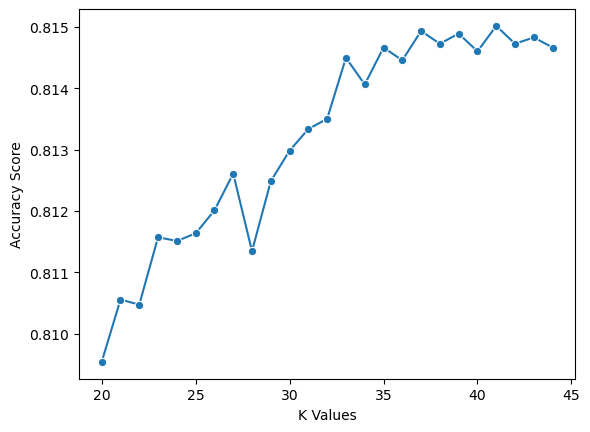

In [16]:
sns.lineplot(x=k_values, y=scores, marker="o")
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")